In [154]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import pandas as pd
import numpy as np
%matplotlib inline

In [79]:
from nbc_analysis.utils.config_utils import get_config
from nbc_analysis.analysis import write_viewer_counts

config = get_config()

>> created example config file '/Users/wmcabee/.config/nbc_analysis/config_example.yaml'
>> loaded config '/Users/wmcabee/.config/nbc_analysis/config.yaml'


In [103]:

indir = Path('/Users/wmcabee/Dropbox (Cognitive Scale)/NBC Analysis/data/NBC2/batches')
df = write_viewer_counts(config_f='default', indir=indir)

>> created example config file '/Users/wmcabee/.config/nbc_analysis/config_example.yaml'
>> Using default config
>> read ve_20190704_0007, 50456
>> read ve_20190701_0015, 49410
>> read ve_20190702_0008, 49931
>> read ve_20190705_0011, 49018
>> read ve_20190707_0006, 50379
>> read ve_20190703_0002, 49759
>> read ve_20190701_0009, 48840
>> read ve_20190702_0014, 48910
>> read ve_20190706_0010, 49301
>> read ve_20190706_0001, 49964
>> read ve_20190702_0005, 49638
>> read ve_20190703_0013, 48810
>> read ve_20190705_0000, 50300
>> read ve_20190701_0004, 50281
>> read ve_20190702_0019, 6171
>> read ve_20190704_0016, 50504
>> read ve_20190703_0016, 49297
>> read ve_20190707_0012, 49758
>> read ve_20190706_0004, 49592
>> read ve_20190702_0000, 49700
>> read ve_20190704_0013, 49730
>> read ve_20190705_0005, 49941
>> read ve_20190701_0001, 50255
>> read ve_20190701_0010, 48508
>> read ve_20190705_0014, 49580
>> read ve_20190706_0009, 49187
>> read ve_20190704_0002, 50384
>> read ve_20190702_0011

In [108]:
dx = df.set_index(['mpid','day']).event_cnt
dx.sort_index(inplace=True)
dx = dx.groupby(level=['mpid','day']).sum()
dx = dx.unstack()
COUNTS = dx

In [121]:
dx = COUNTS.copy()
dx = dx.notna().astype(np.int)
OCCURANCES = dx

,cum_unique,new_viewers
day,,
20190701,222.5,NaN
20190702,409.6,187.0
20190703,583.7,174.2
20190704,720.0,136.2
20190705,836.7,116.7
20190706,950.6,114.0
20190707,1059.9,109.3


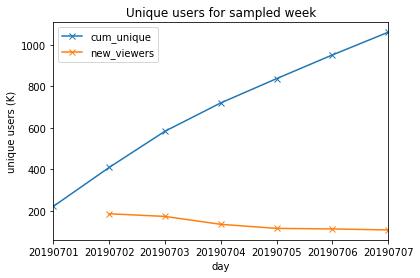

In [169]:


def get_cum_unique(idx):
    df = OCCURANCES.iloc[:, :idx]
    total = df.max(axis=1).sum()
    return total

reader = ( idx for idx, dc in enumerate(OCCURANCES.columns,start=1))
cum_unique = map(get_cum_unique, reader)

df = pd.DataFrame({'cum_unique': cum_unique}, index=OCCURANCES.columns)
df['new_viewers'] = df.cum_unique.diff()
df = df.div(1000).round(1)
ax =df.plot(marker='x')
ax.set_title("Unique users for sampled week")
ax.set_xlabel('day')
ax.set_ylabel('unique users (K)')
df

In [161]:
df.diff()

,cum_unique
day,
20190701,NaN
20190702,187032.0
20190703,174177.0
20190704,136218.0
20190705,116705.0
20190706,113951.0
20190707,109313.0
